# HOMEWORK 5 - Taming text

In [1]:
import nltk 
import pandas as pd 
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%pylab inline
from nltk.corpus import stopwords

import pycountry as pc

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading in the csv file
email_path = "./hillary-clinton-emails/Emails.csv"
email_df = pd.read_csv(email_path, encoding="utf-8")

In [3]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [4]:
email_df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# Question 1: Raw Word Cloud
> This section outputs the word cloud without any preprocessing that is specific for text manipulation. We used the messages within the *ExtractedBodyText* and *ExtractedSubject* as our main point of information. We dropped any NaN rows that were not present in the aforementioned columns and appended the information in the two columns together to create the initial corpus

In [5]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [6]:
email_df.shape

(7945, 22)

In [7]:
email_df.dropna(subset=['ExtractedBodyText'], inplace=True)

In [8]:
email_df.shape

(6742, 22)

In [9]:
email_df['ExtractedSubject'].isnull().any()
email_df.dropna(subset=['ExtractedSubject'], inplace=True)
email_df.shape

(5425, 22)

In [10]:
text = email_df['ExtractedBodyText']

In [11]:
text = text.append(email_df['ExtractedSubject'])

In [12]:
test_text = " ".join(text) # to add space

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,stopwords=stopwords)

In [13]:
def word_cloud_creator(text):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")

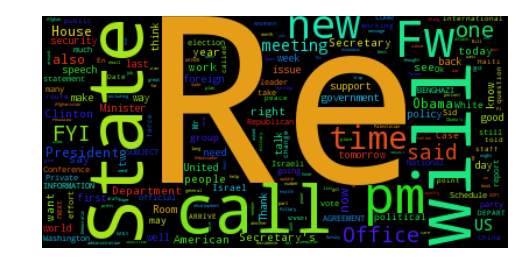

In [14]:
word_cloud_creator(test_text)

##  PREPROCESSING

Strategy :

>Tokenizer : We split the sentences into individual word and specified for certain attributes. For example, you can define a tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else.
The following tokenizer does this for alphanumeric and money expressions (dollars).

>Case folding : This changes the characters in each token from upper to lower case.

> Remove stopwords : these are commons words such as 'the' that are known to not have a huge impact on natural language processing. We used two separate stop word lists to remove as many stopwords as possible under the presumption that neither list was fully comprehensive.

> We decide also to remove the short words (length less than 3 characters), which permits to remove usual short words like I, am ...

> Stemming : We add a boolean value which allows to select the stemming process. Stemming permits to remove morphological affixes from words

In [15]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')
stop_words = STOPWORDS
stop_words_2 = stopwords.words('english')

In [16]:
def preprocess_body_text(df_row,token_tool,word_list1, word_list2,stem_bool=False):
    
    #fetch row by row the ExtractedBodyText
    extractedbodytext = df_row['ExtractedBodyText']
    
    token_body_text = token_tool.tokenize(extractedbodytext)
      
    #lower case  
    
    token_body_text = [token.lower() for token in token_body_text ]
    
    # remove the stopwords of the list of token for both field
    token_body_text = [word for word in token_body_text if word not in word_list1]
    token_body_text = [word for word in token_body_text if word not in word_list2]
    

    token_body_text = [word for word in token_body_text if len(word)>2]
    
    if stem_bool:
        porter = nltk.PorterStemmer()
        token_body_text = [porter.stem(token) for token in token_body_text]
        
    
    body_text_processed = " ".join(token_body_text)
    
    return body_text_processed
    
    
    
            

In [17]:
def preprocess_subject(df_row,token_tool,word_list1, word_list2,stem_bool=False):
    token_tool = tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')
    
    #fetch row by row the Extracted Subject
    extractedsubject = df_row['ExtractedSubject']
    
    token_subject_text = token_tool.tokenize(extractedsubject)
      
    #lower case  
    token_subject_text = [token.lower() for token in token_subject_text ]
    
    # remove the stopwords of the list of token for both field
    token_subject_text = [word for word in token_subject_text if word not in word_list1]
    token_subject_text = [word for word in token_subject_text if word not in word_list2]
    

    token_subject_text = [word for word in token_subject_text if len(word)>2]
    
    
    if stem_bool:
        porter = nltk.PorterStemmer()
        token_subject_text = [porter.stem(token) for token in token_subject_text]
        
    subject_text_processed = " ".join(token_subject_text)
    
    return subject_text_processed
    
    
    
            

In [18]:
email_df['BodyText_Token'] = email_df.apply(preprocess_body_text, args = (tokenizer,stop_words, stop_words_2,),axis=1)

In [19]:
email_df['Subject_Token'] = email_df.apply(preprocess_subject, args = (tokenizer,stop_words, stop_words_2,),axis=1)

In [20]:
email_df['BodyText_Token'].head()

2                                                   thx
5     pis print hrod17 clintonernailcom wednesday se...
8                                                   fyi
9     wednesday september 2012 fwd libya libya sept ...
10                                                  fyi
Name: BodyText_Token, dtype: object

In [21]:
email_df['Subject_Token'].head()

2                                         chris stevens
5     meet right wing extremist behind anti muslim f...
8                                 fvv secretary remarks
9                                                 libya
10                         abz hb3 libya west bank gaza
Name: Subject_Token, dtype: object


# Question 1 (cont'd):  World cloud with pre process

#### WITHOUT STEMMING 

In [22]:
email_df['BodyText_Token'] = email_df.apply(preprocess_body_text, args = (tokenizer,stop_words, stop_words_2,),axis=1)

In [23]:
email_df['Subject_Token'] = email_df.apply(preprocess_subject, args = (tokenizer,stop_words, stop_words_2,),axis=1)

In [24]:
text = email_df['BodyText_Token']
text.append(email_df['Subject_Token'])
text.head()
concatenate_text = " ".join(text)

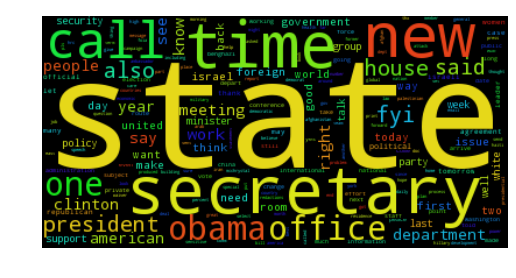

In [25]:
word_cloud_creator(concatenate_text)

####  WITH STEMMING

In [26]:
stem_boolean = True

In [27]:
email_df['BodyText_preprocessed'] = email_df.apply(preprocess_body_text, args = (tokenizer,stop_words, stop_words_2,stem_boolean,),axis=1)

In [28]:
email_df['Subject_preprocessed'] = email_df.apply(preprocess_subject, args = (tokenizer,stop_words, stop_words_2,stem_boolean,),axis=1)

In [29]:
text = email_df['BodyText_preprocessed']
text.append(email_df['Subject_preprocessed'])
text.head()
concatenate_text = " ".join(text)

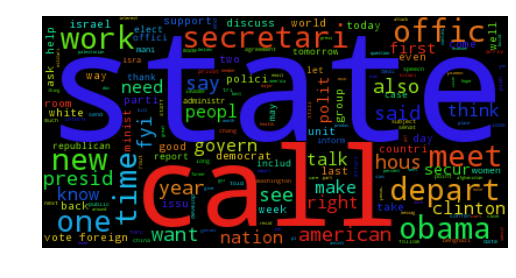

In [30]:
word_cloud_creator(concatenate_text)

### We can clearly see the differences between the wordcloud with and without processing. 

# QUESTION  2
>Strategy :  
1 - We check if there is a country and also the abbreviation in the ExtractedBodyText and ExtractedSubject one by one  
2 - We've notice that some short word as AM, PM,.. appeared often and gave false detections. We decided to not take these words into account  
3 - If is not there ignore the email  
4 - If it's there increase the frequency of country in the new dataframe  
5 - Compute the sentiment of the email, where 0 is a negative sentiment, 0.5 a neutral sentiment and 1 a positive

In [31]:
from nltk.sentiment.util import *

/home/trinh/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [33]:
email_df['token'] = email_df['ExtractedBodyText'].apply(tokenizer.tokenize)
email_df['token'].head()

2                                                 [Thx]
5     [Pis, print, H, hrod17, clintonernailcom, Wedn...
8                                                 [FYI]
9     [B6, Wednesday, September, 12, 2012, 6, 16, PM...
10                                            [Fyi, B6]
Name: token, dtype: object

In [34]:
email_df['token_subject'] = email_df['ExtractedSubject'].apply(tokenizer.tokenize)
email_df['token_subject'].head()

2                                  [Re, Chris, Stevens]
5     [Meet, The, Right, Wing, Extremist, Behind, An...
8                          [FVV, Secretary, s, remarks]
9                                     [more, on, Libya]
10    [AbZ, and, Hb3, on, Libya, and, West, Bank, Gaza]
Name: token_subject, dtype: object

In [35]:
def return_country_and_sentiment(df_row,country_sentiment):
    vader_analyzer = SentimentIntensityAnalyzer()
    tmp = []
    #fetch row by row the ExtractedBodyText and the Extracted Subject
    token_list_extractedbodytext = df_row['token']
    token_list_extractedsubject = df_row['token_subject']
    raw_text = df_row['ExtractedBodyText']
    # remove the stopwords of the list of token for both field
    extractedbodytext = [word for word in token_list_extractedbodytext if word not in stop_words]
    extractedsubject = [word for word in token_list_extractedsubject if word not in stop_words]
    
    
    
    #look in the extractedbodytext
    for token in extractedbodytext:
        # TONGA = TO, SAINT PIERRE AND MIQUELON = PM, NORWAY = NO,
        # ARMENIA = AM, Réunion = RE, Micronesia = FM, Tuvalu = TV, Haiti = HT
        if token in ['AM','PM','TO','RE','NO','FM','FW','HT']:
            continue
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
            
    
    #look in the extractedSubject
    for token in extractedsubject:
        # TONGA = TO, SAINT PIERRE AND MIQUELON = PM, NORWAY = NO,
        # ARMENIA = AM, Réunion = RE, Micronesia = FM, Tuvalu = TV, Haiti = HT
        if token in ['AM','PM','TO','RE','NO','FM','FW','HT']:
            continue
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
            
    #compute the sentiment on the ExtractedBodyText (not token form)
    sentiment = (vader_analyzer.polarity_scores(raw_text)['compound']+1)/2
            
    for elem in tmp:
        if elem in country_sentiment.index:
            country_sentiment.loc[elem]['NumberTimes'] = country_sentiment.loc[elem]['NumberTimes']+1
        else:
            country_sentiment.set_value(elem,['NumberTimes','Sentiment'],[1,0])
        
        #add the sentiment for each country mentionned in the email
        
        country_sentiment.loc[elem]['Sentiment'] = country_sentiment.loc[elem]['Sentiment']+sentiment
            
    

    
    

In [36]:
country_sentiment = pd.DataFrame(columns=['NumberTimes','Sentiment'])

In [37]:
country_sentiment

,NumberTimes,Sentiment


In [38]:
_=email_df.apply(return_country_and_sentiment,args=(country_sentiment,),axis=1)

In [39]:
country_sentiment.sort_values(by='NumberTimes',ascending=False).head()

,NumberTimes,Sentiment
United States,170.0,118.35220
Haiti,138.0,87.73705
India,136.0,86.16800
Afghanistan,82.0,54.76525
Pakistan,78.0,49.46915


In [40]:
def average_sentiment(dataframe):
    return dataframe['Sentiment']/dataframe['NumberTimes']

In [41]:
country_sentiment['Sentiment'] = country_sentiment.apply(average_sentiment, axis=1)

In [42]:
country_sentiment.sort_values(by="NumberTimes",ascending=False).head()

,NumberTimes,Sentiment
United States,170.0,0.696189
Haiti,138.0,0.635776
India,136.0,0.633588
Afghanistan,82.0,0.667869
Pakistan,78.0,0.634220


In [43]:
country=country_sentiment[country_sentiment['NumberTimes']>20]

In [44]:
country['Sentiment']

Libya            0.477589
United States    0.696189
Egypt            0.722303
Iraq             0.644760
Israel           0.685812
India            0.633588
Panama           0.781700
Austria          0.729491
Turkey           0.657729
Afghanistan      0.667869
Mexico           0.712598
Montserrat       0.740762
China            0.733067
Pakistan         0.634220
Tuvalu           0.800090
Honduras         0.639311
Haiti            0.635776
Brazil           0.780967
Ireland          0.709623
Sudan            0.644650
Belarus          0.610076
Canada           0.638668
Guinea           0.655574
Japan            0.715993
Nicaragua        0.655693
Name: Sentiment, dtype: float64

In [45]:
country.head()

,NumberTimes,Sentiment
Libya,63.0,0.477589
United States,170.0,0.696189
Egypt,29.0,0.722303
Iraq,49.0,0.644760
Israel,67.0,0.685812


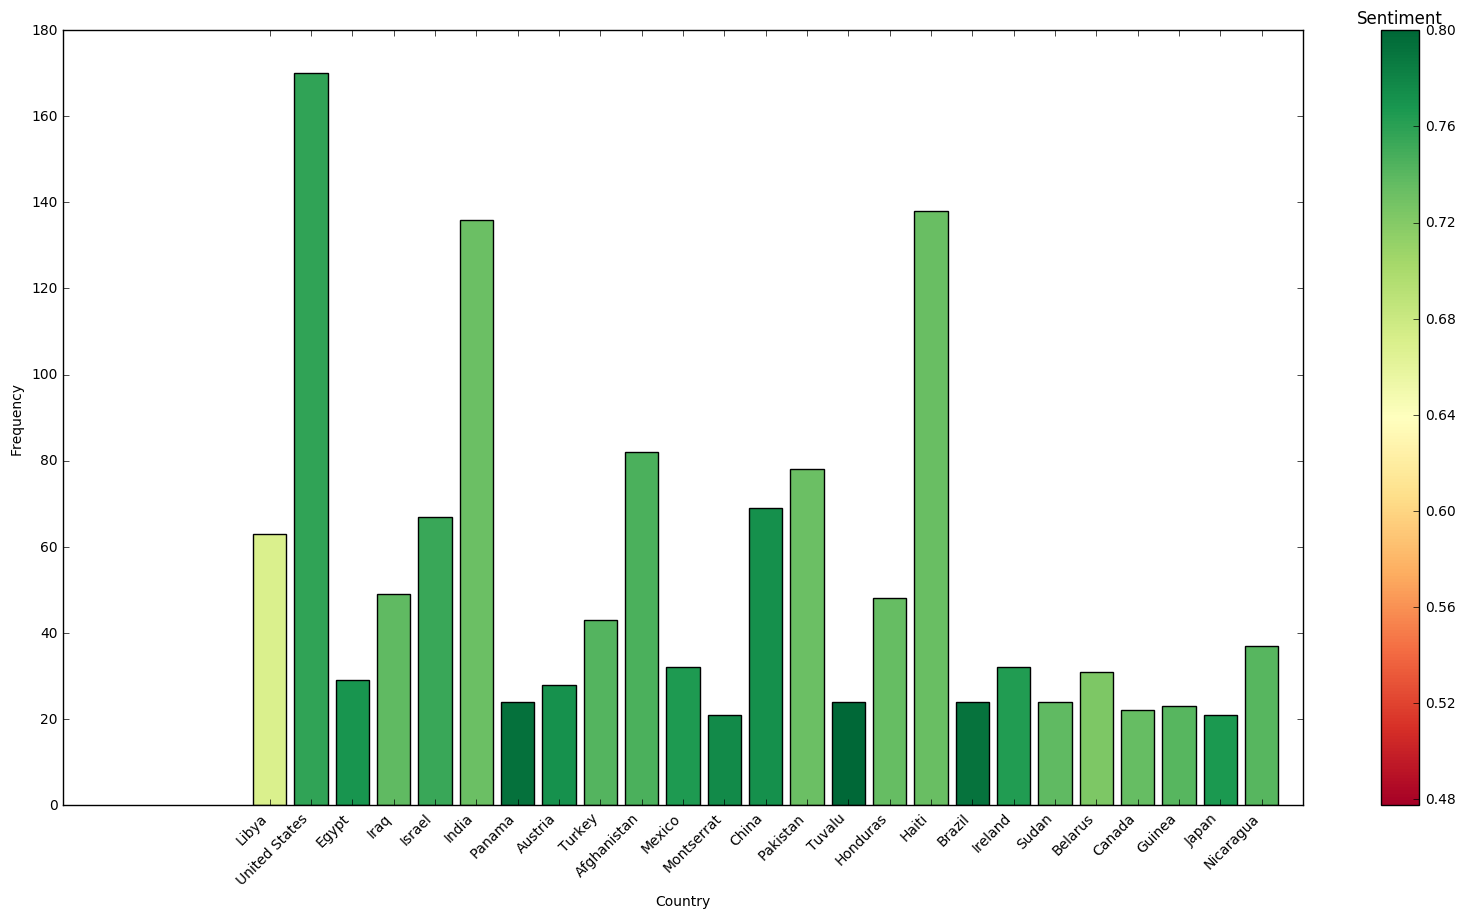

In [46]:
# http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
from matplotlib import cm
plt.figure(figsize=(20,10))

# Set up colors : red to green
y = np.array(country['Sentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y,cmap = cm.RdYlGn)
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(country.shape[0]), country['NumberTimes'], align='center', tick_label=country.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

In [47]:
import gensim

In [48]:
email_df['BodyText_Token'] = email_df.apply(preprocess_body_text, args = (tokenizer,stop_words, stop_words_2,),axis=1)

In [49]:
my_corpus = email_df['BodyText_Token'].apply(tokenizer.tokenize)
corpus_series = pd.Series(my_corpus)
#define dictionary of the actual words as bag of words model does not keep this information
corpus_dict = gensim.corpora.dictionary.Dictionary(corpus_series)

print(corpus_dict)

Dictionary(22555 unique tokens: [u'woods', u'hanging', u'jairam', u'scold', u'fsos']...)


In [50]:
#converts to bag of words representation
corpus_bow = [corpus_dict.doc2bow(word) for word in corpus_series]

In [51]:
#this creates and saves an LDA model for topics ranging from 5 to 50 in steps of 5
for x in range(5,51,5):
    number_of_topics = x
    number_of_topics_str = str(number_of_topics)
    stem = 'corpus'+ number_of_topics_str +".lda"

    #define LDA model 
    #As the bag of words are word_id mapped to frequency. We need a way to map
    #each word id to the word. This is done via id2word via the corpus dictionary
    my_model = gensim.models.ldamodel.LdaModel(corpus= corpus_bow,
                                               num_topics=number_of_topics, 
                                               id2word=corpus_dict)
    #save the model to separate file
    my_model.save(stem)

In [52]:
import re

#number of words associated with each number
n_words = 10

#for each topic, we load the model correponding to the topic number
for x in range(5,51,5):
    number_of_topics = x
    number_of_topics_str = str(number_of_topics)
    stem = 'corpus'+ number_of_topics_str+".lda"
    my_model= gensim.models.LdaModel.load(stem)
    
    print "\n"
    print "The current model has " + number_of_topics_str + " topics" 
    print "Topic num \tList of words associated with the topic"

    #show topic returns the topic number and the words&weighting associated with the topic
    for i in range(x):
        current_model = my_model.show_topics(num_topics = number_of_topics,num_words = n_words)
        #topic number
        topic_number = current_model[i][0]
        
        #this finds all the words inbetween ""
        words_belong_to_topic = re.findall('(\w+)',re.sub("\d", "",current_model[i][1]))

        print "Topic #:"+ str(topic_number) + "\t" + ', '.join(words_belong_to_topic)

#prints the number of topics that was inputed when the model was created
shape(my_model.print_topics(num_topics = number_of_topics))



The current model has 5 topics
Topic num 	List of words associated with the topic
Topic #:0	call, obama, also, house, new, first, president, one, secretary, time
Topic #:1	fyi, party, percent, said, vote, obama, see, state, republican
Topic #:2	obama, one, israel, state, new, right, said, american, president, also
Topic #:3	state, time, one, good, new, know, work, also, department, see
Topic #:4	secretary, office, state, meeting, call, department, room, time, arrive, route


The current model has 10 topics
Topic num 	List of words associated with the topic
Topic #:0	state, secretary, office, time, meeting, department, also, conference
Topic #:1	call, percent, state, sent, favorable, today, enough, unfavorable, obama
Topic #:2	obama, party, republican, tea, american, one, right, skousen, israel, new
Topic #:3	bill, state, house, draft, work, haiti, doc, health, clinton, people
Topic #:4	one, see, think, president, american, time, people, right, also, israel
Topic #:5	new, support, gov

(50, 2)

In [53]:
import pyLDAvis.gensim as pyldg
import pyLDAvis

In [54]:
vis_prep = pyldg.prepare(my_model,corpus_bow,corpus_dict)

In [55]:
pyLDAvis.save_html(vis_prep,"topic_modeling.html")